In [66]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [67]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [69]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [70]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [71]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [72]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [73]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [74]:
# Find the most recent date in the data set.

most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"{most_recent_date}")

('2017-08-23',)


<function matplotlib.pyplot.show(close=None, block=None)>

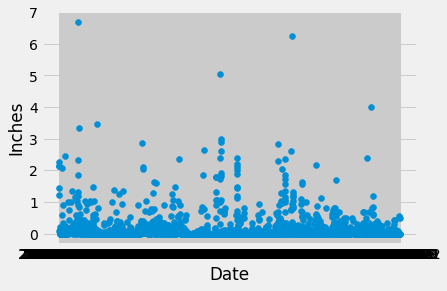

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import datetime as dt

# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
yr_back = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > yr_back).\
filter(measurement.date< most_recent_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(query)
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df_final = prcp_df.sort_values(by="date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.scatter(prcp_df_final.index, prcp_df_final["prcp"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show

In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
max = prcp_df_final["prcp"].max()
print(f"{max} inches was the max rainfall")
min = prcp_df_final["prcp"].min()
print(f"{min} inches was the min rainfall")
avg = prcp_df_final["prcp"].mean()
print(f"{avg} inches was the average rainfall")
median = prcp_df_final["prcp"].median()
print(f"{median} inches was the median rainfall")

6.7 inches was the max rainfall
0.0 inches was the min rainfall
0.17654898060666271 inches was the average rainfall
0.02 inches was the median rainfall


# Exploratory Station Analysis

In [93]:
# Design a query to calculate the total number stations in the dataset
query_2 = session.query(measurement.station).distinct().count()
query_2

9

In [109]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
query_3 = session.query(measurement.station, func.count(measurement.station).label('rows')).group_by(measurement.station).order_by(('rows'))

# List the stations and the counts in descending order.
df = pd.DataFrame(query_3)
df

,station,rows
0,USC00518838,511
1,USC00517948,1372
2,USC00511918,1979
3,USC00514830,2202
4,USC00516128,2612
5,USC00519523,2669
6,USC00513117,2709
7,USC00519397,2724
8,USC00519281,2772


In [134]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = "USC00519281"
query_4 = session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(f'The minimum temp at the most active station is {query_4}')
query_5 = session.query(func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(f'The maximum temp at the most active station is {query_5}')
query_6 = session.query(func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(f'The average temp at the most active station is {query_6}')

The minimum temp at the most active station is [(54.0,)]
The maximum temp at the most active station is [(85.0,)]
The average temp at the most active station is [(71.66378066378067,)]


<function matplotlib.pyplot.show(close=None, block=None)>

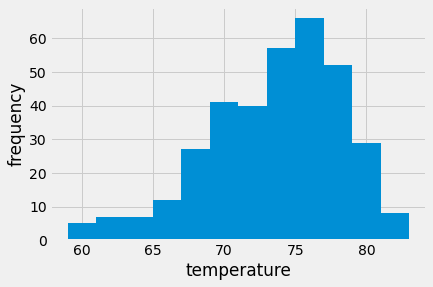

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_7 = session.query(measurement.tobs).\
filter(measurement.station == "USC00519281").\
filter(measurement.date > yr_back).\
filter(measurement.date< most_recent_date).all()

station_temp_df = pd.DataFrame(query_7)
plt.hist(station_temp_df['tobs'], bins=12)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.show

# Close session

In [148]:
# Close Session
session.close()